In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

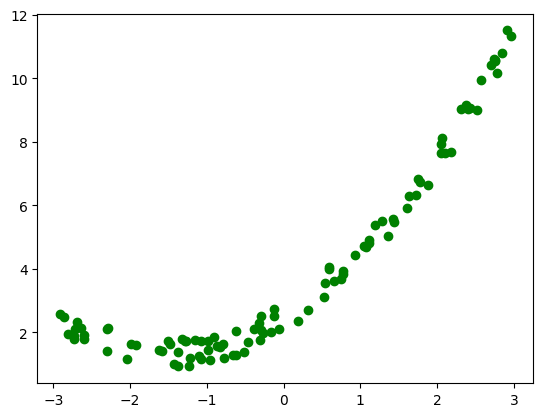

In [4]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x**2 + 1.5*x+2 + np.random.rand(100, 1)

plt.scatter(x,y, color = 'g')

In [5]:
from sklearn.model_selection import train_test_split

x_tarin, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)

In [6]:
from sklearn.linear_model import LinearRegression

regression_1 = LinearRegression()


In [7]:
regression_1.fit(x_tarin,  y_train)


LinearRegression()

In [8]:
from sklearn.metrics import r2_score

score = r2_score(y_test, regression_1.predict(x_test))
print(score)

0.77407747163769


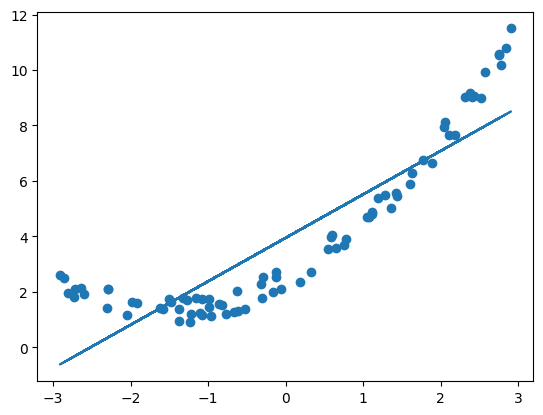

In [13]:
plt.plot(x_tarin, regression_1.predict(x_tarin))
plt.scatter(x_tarin, y_train)

In [15]:
# apply polynomial transormation\

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 2, include_bias= True)

x_train_poly = poly.fit_transform(x_tarin)
x_test_poly = poly.transform(x_test)

In [16]:
x_train_poly

array([[ 1.00000000e+00,  2.57006151e+00,  6.60521616e+00],
       [ 1.00000000e+00, -8.62910552e-01,  7.44614620e-01],
       [ 1.00000000e+00, -2.94622511e-01,  8.68024241e-02],
       [ 1.00000000e+00, -6.00344989e-02,  3.60414106e-03],
       [ 1.00000000e+00,  2.74805739e+00,  7.55181941e+00],
       [ 1.00000000e+00, -2.91368046e+00,  8.48953384e+00],
       [ 1.00000000e+00, -1.37154500e+00,  1.88113570e+00],
       [ 1.00000000e+00, -1.37463151e+00,  1.88961178e+00],
       [ 1.00000000e+00, -3.01703120e-01,  9.10247725e-02],
       [ 1.00000000e+00,  1.11432299e+00,  1.24171573e+00],
       [ 1.00000000e+00,  2.83992176e+00,  8.06515559e+00],
       [ 1.00000000e+00, -9.60609278e-01,  9.22770185e-01],
       [ 1.00000000e+00,  1.43949373e+00,  2.07214219e+00],
       [ 1.00000000e+00, -1.91881930e+00,  3.68186752e+00],
       [ 1.00000000e+00, -1.69029681e-01,  2.85710332e-02],
       [ 1.00000000e+00, -5.20749415e-01,  2.71179953e-01],
       [ 1.00000000e+00, -2.86197435e+00

In [17]:
x_test_poly

array([[ 1.        ,  1.72319587,  2.96940402],
       [ 1.        , -0.46377198,  0.21508445],
       [ 1.        , -0.90399053,  0.81719888],
       [ 1.        , -2.68671409,  7.21843259],
       [ 1.        ,  2.7029114 ,  7.30573005],
       [ 1.        ,  0.92671669,  0.85880383],
       [ 1.        ,  0.77642577,  0.60283698],
       [ 1.        , -1.27870457,  1.63508539],
       [ 1.        ,  0.5237482 ,  0.27431218],
       [ 1.        ,  1.75510622,  3.08039783],
       [ 1.        , -0.37967208,  0.14415088],
       [ 1.        , -0.26869888,  0.07219909],
       [ 1.        , -0.79550159,  0.63282278],
       [ 1.        , -2.59538257,  6.73601069],
       [ 1.        ,  2.04924974,  4.19942449],
       [ 1.        , -0.2938599 ,  0.08635364],
       [ 1.        , -2.72630333,  7.43272986],
       [ 1.        , -1.42691066,  2.03607404],
       [ 1.        ,  2.74209546,  7.51908751],
       [ 1.        ,  2.95998747,  8.76152583]])

In [20]:
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.996071712381726


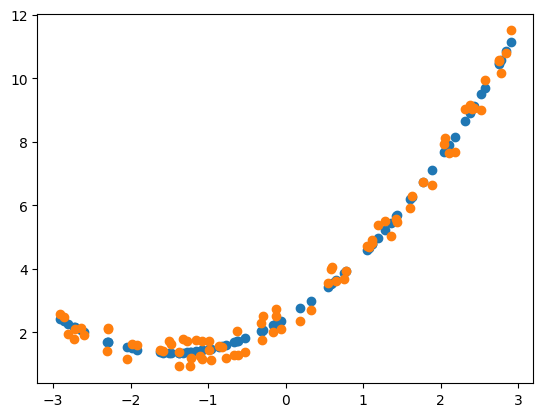

In [27]:
plt.scatter(x_tarin, regression.predict(x_train_poly))
plt.scatter(x_tarin, y_train)

In [28]:
# prediction of new data

x_new = np.linspace(-3, 3, 200).reshape(200, 1)
n_new_poly = poly.transform(x_new)


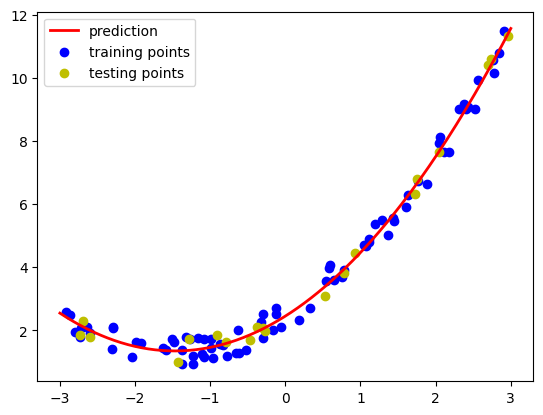

In [39]:
y_new = regression.predict(n_new_poly)
plt.plot(x_new, y_new, 'r-', linewidth = 2, label = 'prediction')
plt.scatter(x_tarin, y_train, color = 'b', label = 'training points')
plt.scatter(x_test, y_test, color = 'y', label = 'testing points')
plt.legend()

In [54]:

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 3, include_bias= True)

x_train_poly = poly.fit_transform(x_tarin)
x_test_poly = poly.transform(x_test)

In [55]:
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.996128231088768


In [56]:
# pipleline for polynomial degree:

from sklearn.pipeline import Pipeline

In [89]:
def poly_regression(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly = PolynomialFeatures(degree= degree,include_bias = True)
    reg = LinearRegression()

    poly_reg = Pipeline([
        ('poly features', poly),
        ('regression', reg)
    ])
    
    poly_reg.fit(x_tarin, y_train)
    y_pred_new = poly_reg.predict(x_new)

    # plots:
    plt.plot(x_new, y_pred_new, 'r', label = f'degree {degree}', linewidth = 3)
    plt.scatter(x_tarin, y_train, c='g',marker = '.', label = 'train data',linewidth = 3)
    plt.scatter(x_test, y_test,c='b',marker = '.', label = 'test data')
    plt.legend(loc = 'upper left')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([-4,4,0,10])
    plt.show()

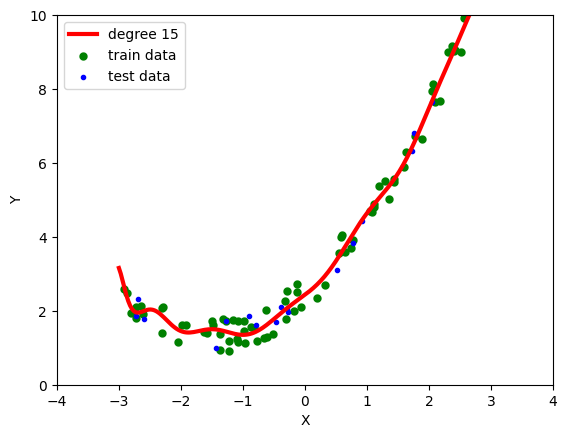

In [90]:
poly_regression(15)

In [64]:
lst = [1,2,34,4,5,6,7]
print(*lst)

1 2 34 4 5 6 7
